In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
    import pandas as pd
import glob
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

In [2]:
from main.data_tools.extract_ntuples import get_pd, get_np

Welcome to JupyROOT 6.26/04


# Generator

In [17]:
file_name = '/media/jykim/T7/storage/Ntuples_ghi/D2phipi0/genlevel_D2phipi0_mdst_100000_*.root'
# file_name = '/home/jykim/ntuple_10e5.root'

base_filter = 'D0_M>0'
signal_variables = ['D0_M']
tree = 'phi'

In [18]:
pd_df1 = get_pd(file=file_name, tree=tree,base_filter=base_filter,variables=signal_variables)

In [19]:
pd_df1

,D0_M
0,1.86483
1,1.86483
2,1.86483
3,1.86483
4,1.86483
...,...
4835064,1.86483
4835065,1.86483
4835066,1.86483
4835067,1.86483


In [16]:


unique_values_count = pd_df1['__event__'].unique()

print("Number of unique values:", unique_values_count)
len(unique_values_count)

Number of unique values: [    1     3     4 ... 64875 16444 55859]


100000

In [9]:
eff1=len(pd_df1)/1e+7
print(eff1)

0.4835069


### From 10^7 generation, the above numbers are detected

# Vg reconstruction

In [3]:
def cal_eff_purity(file_name,file_list, tree, base_filter, N_gen):
    
    variables = ['Dstarp_isSignal','D0_M','__experiment__', '__run__', '__event__']
    
    N_rec = 0
    N_events_rec = 0
    # Initialize an empty dataframe to store concatenated results
    concatenated_df = pd.DataFrame()

    for file in file_list:
        recon_df = get_pd(file, tree, base_filter, variables)
        N_rec += len(recon_df)
        extracted_df = recon_df[["__experiment__", "__run__", "__event__"]].drop_duplicates()
        N_events_rec += len(extracted_df)
        # Concatenate the extracted dataframe with the concatenated_df
        concatenated_df = pd.concat([concatenated_df, extracted_df], ignore_index=True)

    multiplicity = len(concatenated_df) / N_rec

    eff = N_rec/N_gen
    event_eff = N_events_rec/N_gen
    
    recon_df = get_pd(file_name, tree, base_filter, variables)
    N_true = len(recon_df.query('Dstarp_isSignal==1'))
    purity = N_true/N_rec
    
    print(f"event_eff={event_eff:.7f}, ff={eff:.7f}, purity={purity:.7f}, multiplicity={multiplicity:.7f}")
    
    return (event_eff, eff, purity, multiplicity)

## pre selection

In [4]:
file_name = '/media/jykim/T7/storage/Ntuples_ghi/D2phigamma/presel_Vg_roeVpi0_D2phigamma_mdst_100000_*.root'


In [3]:
file_name = '/media/jykim/T7/storage/Ntuples_ghi/D2phipi0/presel_Vg_roeVpi0_D2phipi0_mdst_100000_*.root'
# file_name = '/home/jykim/ntuple_10e5.root'

base_filter = 'D0_M>0'
base_filter = 'D0_M>1.67 && D0_M<2.05'
base_filter = 'D0_M>1.67 && D0_M<2.05 && abs(Dstarp_delM-(2.0103-1.8648))<0.0008'
# base_filter = 'D0_M>1.67 && D0_M<2.05 &&  dM_pi0_75MeV>0.023'
base_filter = 'D0_M>1.67 && D0_M<2.05 && abs(Dstarp_delM-(2.0103-1.8648))<0.0008'

signal_variables = ['D0_M','Dstarp_delM','Dstarp_chiProb','ROE_Dstar_chiProb','ROE_Mgg_75MeV',\
                    'soft_clusterTheta','ROE_Mgg','soft_clusterReg','soft_E','veto_daughterAngle','veto_DiffOfPhi_01','ROE_Dstar_isSignal',\
                   'ROE_Mgg_50MeV','soft_clusterReg_50MeV','soft_E_50MeV','veto_daughterAngle_50MeV','veto_DiffOfPhi_01_50MeV','ROE_Dstar_isSignal_50MeV',\
                   'ROE_Mgg_75MeV','soft_clusterReg_75MeV','soft_E_75MeV','veto_daughterAngle_75MeV','veto_DiffOfPhi_01_75MeV','ROE_Dstar_isSignal_75MeV']
tree = 'phi'

In [4]:
pd_df2 = get_pd(file=file_name, tree=tree,base_filter=base_filter,variables=signal_variables)
# candidate_eff2=len(pd_df2)/1e+7
# print(eff2)

In [5]:
pd_df2

,D0_M,Dstarp_delM,Dstarp_chiProb,ROE_Dstar_chiProb,ROE_Mgg_75MeV,soft_clusterTheta,ROE_Mgg,soft_clusterReg,soft_E,veto_daughterAngle,...,soft_clusterReg_50MeV,soft_E_50MeV,veto_daughterAngle_50MeV,veto_DiffOfPhi_01_50MeV,ROE_Dstar_isSignal_50MeV,soft_clusterReg_75MeV,soft_E_75MeV,veto_daughterAngle_75MeV,veto_DiffOfPhi_01_75MeV,ROE_Dstar_isSignal_75MeV
0,1.794544,0.144920,0.533930,0.655933,0.135621,0.501401,0.135621,1.0,0.080665,0.755191,...,1.0,0.080665,0.755191,-0.844998,1.0,1.0,0.080665,0.755191,-0.844998,1.0
1,1.758614,0.145917,0.060635,0.018928,0.146601,2.034548,0.146601,2.0,0.195058,0.301766,...,2.0,0.195058,0.301766,-0.335454,1.0,2.0,0.195058,0.301766,-0.335454,1.0
2,1.816105,0.145696,0.164144,0.079416,0.485091,1.987332,0.163264,2.0,0.020920,1.218739,...,2.0,0.054886,0.816381,-0.311226,NaN,2.0,0.096140,1.832316,2.119749,0.0
3,1.751946,0.145893,0.078435,0.126299,0.133428,1.058328,0.133428,2.0,0.264877,0.194438,...,2.0,0.264877,0.194438,0.210424,1.0,2.0,0.264877,0.194438,0.210424,1.0
4,1.819343,0.145518,0.142720,0.219188,0.135534,0.718599,0.135534,2.0,0.141070,0.498487,...,2.0,0.141070,0.498487,0.574944,1.0,2.0,0.141070,0.498487,0.574944,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287222,1.783293,0.144994,0.157502,0.234327,0.333428,2.534402,0.134449,3.0,0.024405,0.775240,...,2.0,0.135898,0.817007,-0.793804,0.0,2.0,0.135898,0.817007,-0.793804,0.0
287223,1.824533,0.145125,0.001244,0.002767,0.155162,0.238362,0.135669,1.0,0.037104,1.384739,...,2.0,0.087182,0.992857,0.849207,0.0,2.0,0.087182,0.992857,0.849207,0.0
287224,1.806590,0.145690,0.243925,0.238463,0.128740,0.929438,0.128740,2.0,0.243302,0.153349,...,2.0,0.243302,0.153349,0.189985,1.0,2.0,0.243302,0.153349,0.189985,1.0
287225,1.861036,0.145262,0.224526,0.284892,0.427381,0.911454,0.141266,2.0,0.042379,0.583596,...,2.0,0.067295,0.603200,-0.720493,0.0,1.0,0.140688,0.995995,-1.487725,0.0


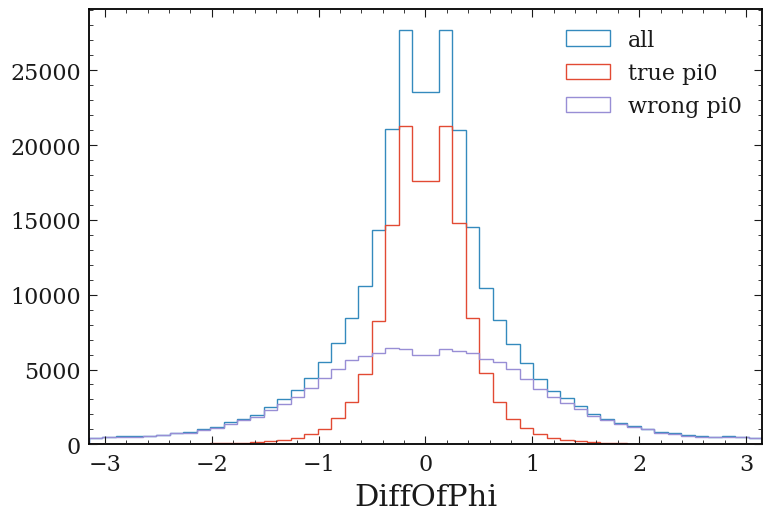

In [11]:
x_min = -3.15
x_max = 3.15
plt.hist(pd_df2['veto_DiffOfPhi_01'],histtype='step', bins=np.linspace(x_min,x_max,51), label='all')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal']==1) ]['veto_DiffOfPhi_01'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal']!=1) ]['veto_DiffOfPhi_01'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong pi0')

# plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal']==1) & (pd_df2['soft_E']>0.03)]['veto_DiffOfPhi_01'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0')
# plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal']!=1) & (pd_df2['soft_E']>0.03)]['veto_DiffOfPhi_01'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong pi0')

plt.xlim(x_min, x_max)
plt.legend()
plt.xlabel( 'DiffOfPhi')
plt.tight_layout()
plt.savefig('/home/jykim/workspace/ssd_T7/saved_plots/diffofphi.png')

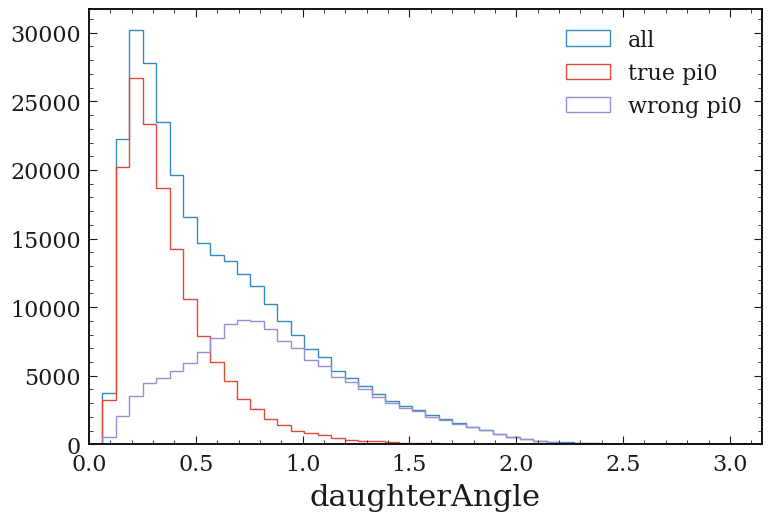

In [12]:
x_min = 0 
x_max = 3.15
plt.hist(pd_df2['veto_daughterAngle'],histtype='step', bins=np.linspace(x_min,x_max,51), label='all')
plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal']==1]['veto_daughterAngle'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0')
plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal']!=1]['veto_daughterAngle'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong pi0')
# plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal']==1) & (pd_df2['soft_E']<0.05)]['veto_daughterAngle'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0')
# plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal']!=1) & (pd_df2['soft_E']<0.05)]['veto_daughterAngle'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong pi0')

plt.xlim(x_min, x_max)
plt.legend()
plt.xlabel( 'daughterAngle')
plt.tight_layout()
plt.savefig('/home/jykim/workspace/ssd_T7/saved_plots/daughterAngle.png')

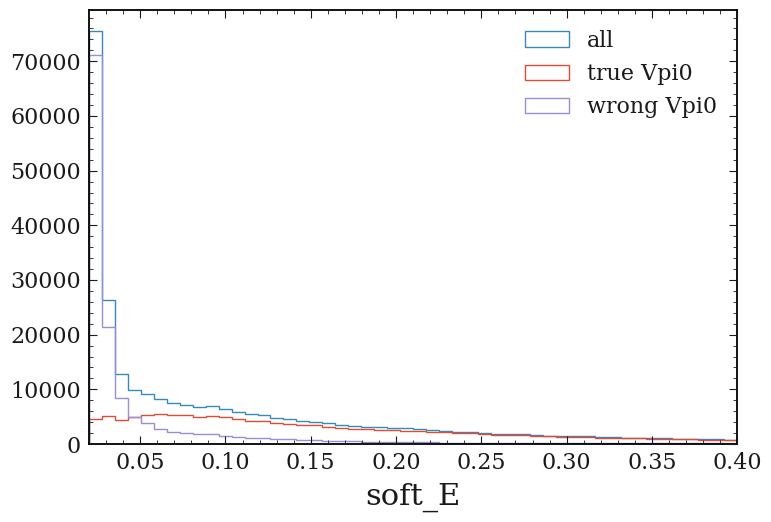

In [127]:
x_min = 0.02
x_max = 0.4
plt.hist(pd_df2['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51), label='all')
plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal']==1]['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true Vpi0')
plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal']!=1]['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong Vpi0')

# plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal']==1) & (pd_df2['soft_clusterReg']==1)]['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0 & soft forward')
# plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal']==1) & (pd_df2['soft_clusterReg']==2)]['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0 & soft barrel')
# plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal']==1) & (pd_df2['soft_clusterReg']==3)]['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0 & soft backward')


# plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal']!=1]['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong pi0')

plt.xlim(x_min, x_max)
plt.legend()
plt.xlabel( 'soft_E')
plt.tight_layout()

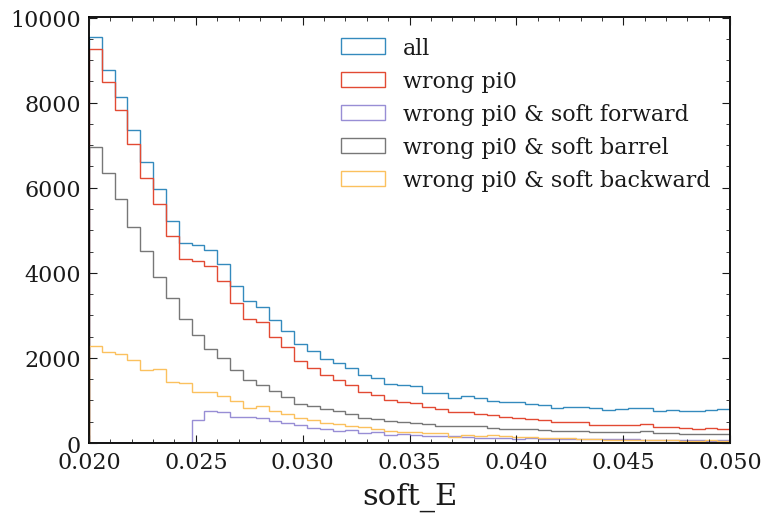

In [136]:
x_min = 0.02
x_max = 0.05
plt.hist(pd_df2['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51), label='all')
plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal']!=1]['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong pi0')

# plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal']==1]['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal']!=1) & (pd_df2['soft_clusterReg']==1)]['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong pi0 & soft forward')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal']!=1) & (pd_df2['soft_clusterReg']==2)]['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong pi0 & soft barrel')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal']!=1) & (pd_df2['soft_clusterReg']==3)]['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong pi0 & soft backward')


# plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal']!=1]['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong pi0')

plt.xlim(x_min, x_max)
plt.legend()
plt.xlabel( 'soft_E')
plt.tight_layout()

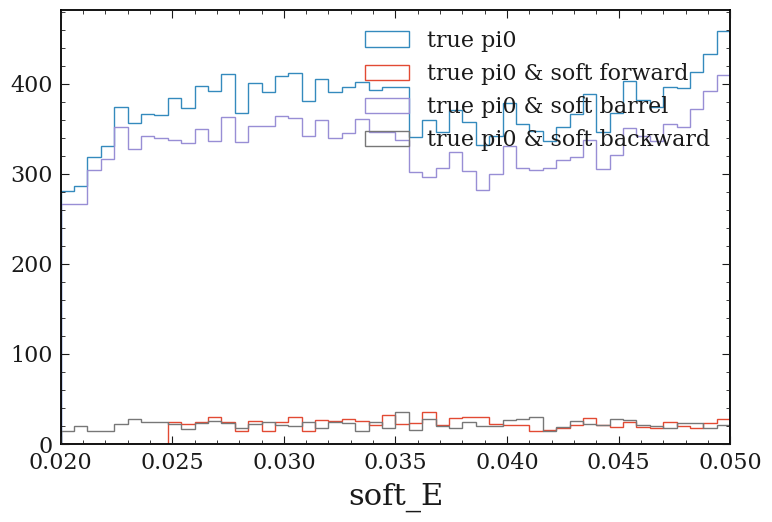

In [137]:
x_min = 0.02
x_max = 0.05
# plt.hist(pd_df2['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51), label='all')
# plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal']!=1]['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong pi0')

plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal']==1]['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal']==1) & (pd_df2['soft_clusterReg']==1)]['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0 & soft forward')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal']==1) & (pd_df2['soft_clusterReg']==2)]['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0 & soft barrel')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal']==1) & (pd_df2['soft_clusterReg']==3)]['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0 & soft backward')


# plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal']!=1]['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong pi0')

plt.xlim(x_min, x_max)
plt.legend()
plt.xlabel( 'soft_E')
plt.tight_layout()

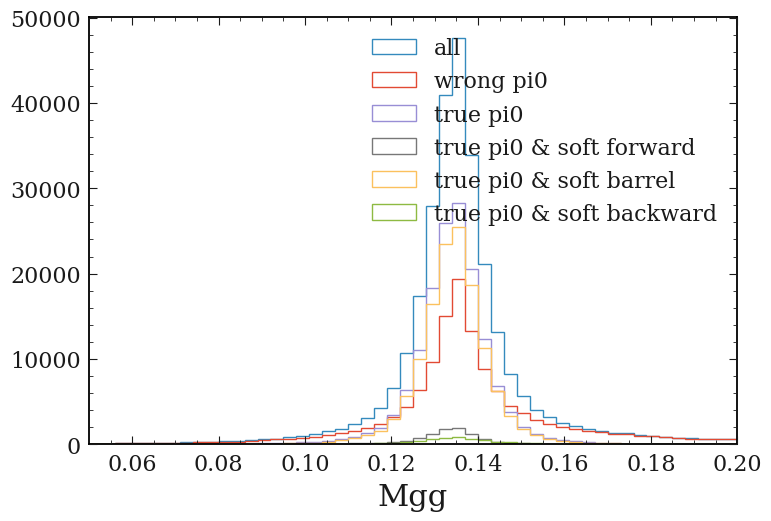

In [129]:
x_min = 0.05
x_max = 0.2
plt.hist(pd_df2['ROE_Mgg'],histtype='step', bins=np.linspace(x_min,x_max,51), label='all')
plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal']!=1]['ROE_Mgg'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong pi0')

plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal']==1]['ROE_Mgg'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal']==1) & (pd_df2['soft_clusterReg']==1)]['ROE_Mgg'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0 & soft forward')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal']==1) & (pd_df2['soft_clusterReg']==2)]['ROE_Mgg'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0 & soft barrel')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal']==1) & (pd_df2['soft_clusterReg']==3)]['ROE_Mgg'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0 & soft backward')


# plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal']!=1]['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong pi0')

plt.xlim(x_min, x_max)
plt.legend()
plt.xlabel( 'Mgg')
plt.tight_layout()

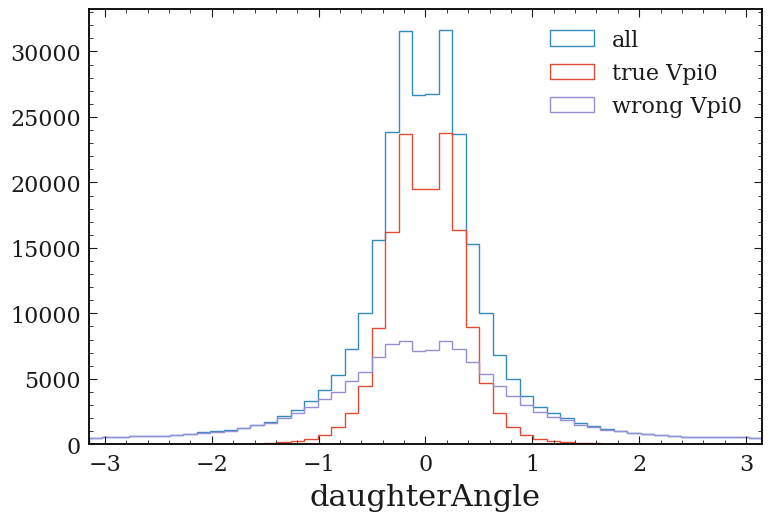

In [106]:
x_min = -3.15
x_max = 3.15
plt.hist(pd_df2['veto_DiffOfPhi_01_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51), label='all')
plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal_50MeV']==1]['veto_DiffOfPhi_01_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true Vpi0')
plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal_50MeV']!=1]['veto_DiffOfPhi_01_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong Vpi0')

plt.xlim(x_min, x_max)
plt.legend()
plt.xlabel( 'daughterAngle')
plt.tight_layout()

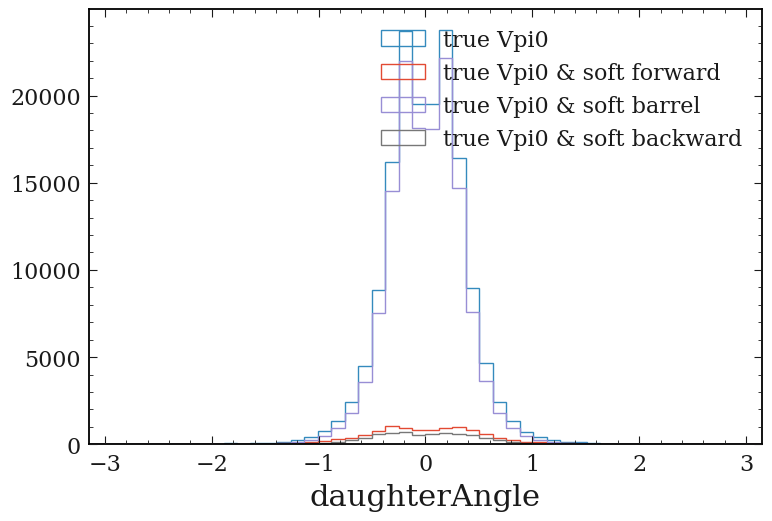

In [107]:
x_min = -3.15
x_max = 3.15
# plt.hist(pd_df2['veto_DiffOfPhi_01_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51), label='all')
plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal_50MeV']==1]['veto_DiffOfPhi_01_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true Vpi0')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal_50MeV']==1) & (pd_df2['soft_clusterReg_50MeV']==1)]['veto_DiffOfPhi_01_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true Vpi0 & soft forward')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal_50MeV']==1) & (pd_df2['soft_clusterReg_50MeV']==2)]['veto_DiffOfPhi_01_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true Vpi0 & soft barrel')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal_50MeV']==1) & (pd_df2['soft_clusterReg_50MeV']==3)]['veto_DiffOfPhi_01_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true Vpi0 & soft backward')


# plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal_50MeV']!=1]['veto_DiffOfPhi_01_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong Vpi0')

plt.xlim(x_min, x_max)
plt.legend()
plt.xlabel( 'daughterAngle')
plt.tight_layout()

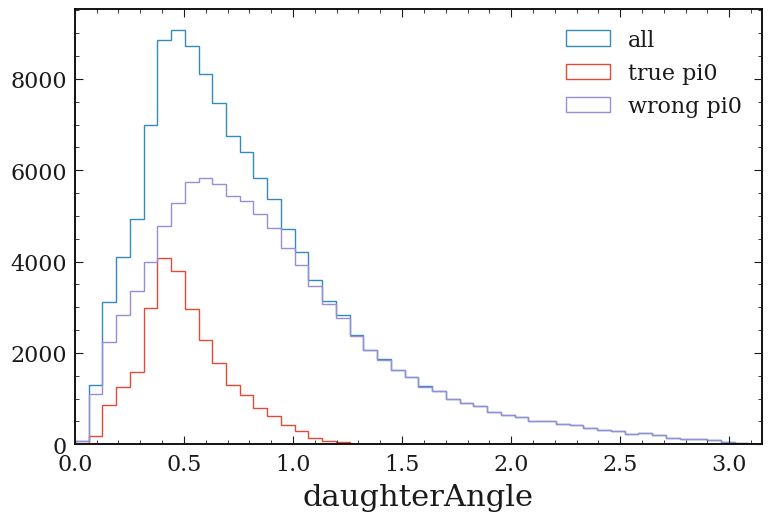

In [35]:
x_min = 0 
x_max = 3.15
plt.hist(pd_df2['veto_daughterAngle_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51), label='all')
plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal_50MeV']==1]['veto_daughterAngle_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0')
plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal_50MeV']!=1]['veto_daughterAngle_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong pi0')

plt.xlim(x_min, x_max)
plt.legend()
plt.xlabel( 'daughterAngle')
plt.tight_layout()

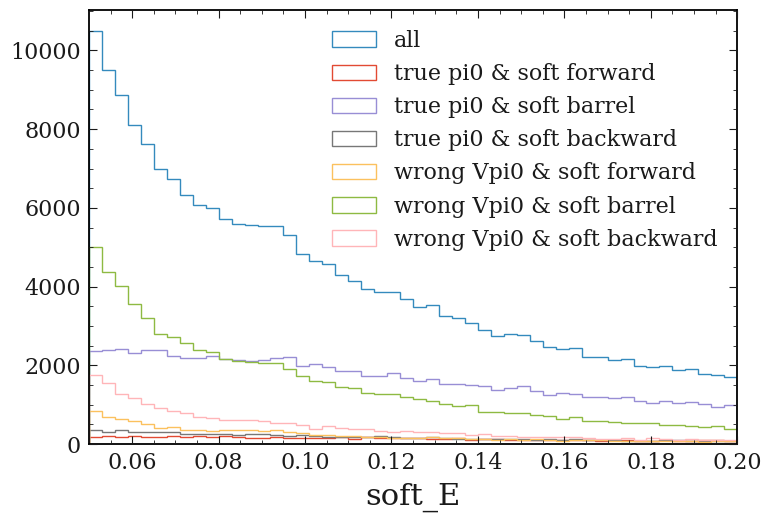

In [139]:
x_min = 0.05
x_max = 0.2
plt.hist(pd_df2['soft_E_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51), label='all')
# plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal_50MeV']==1]['soft_E_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal_50MeV']==1) & (pd_df2['soft_clusterReg']==1)]['soft_E_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0 & soft forward')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal_50MeV']==1) & (pd_df2['soft_clusterReg']==2)]['soft_E_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0 & soft barrel')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal_50MeV']==1) & (pd_df2['soft_clusterReg']==3)]['soft_E_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0 & soft backward')

# plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal_50MeV']!=1]['soft_E_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong Vpi0')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal_50MeV']!=1) & (pd_df2['soft_clusterReg']==1)]['soft_E_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong Vpi0 & soft forward')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal_50MeV']!=1) & (pd_df2['soft_clusterReg']==2)]['soft_E_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong Vpi0 & soft barrel')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal_50MeV']!=1) & (pd_df2['soft_clusterReg']==3)]['soft_E_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong Vpi0 & soft backward')



plt.xlim(x_min, x_max)
plt.legend()
plt.xlabel( 'soft_E')
plt.tight_layout()

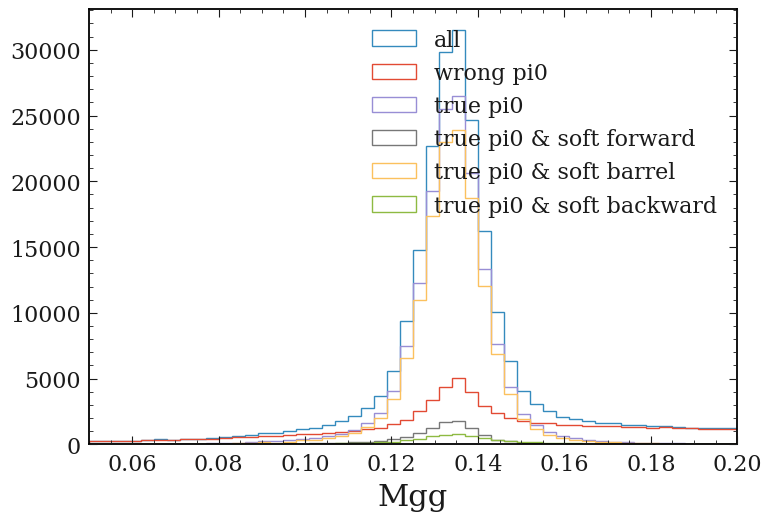

In [130]:
x_min = 0.05
x_max = 0.2
plt.hist(pd_df2['ROE_Mgg_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51), label='all')
plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal_50MeV']!=1]['ROE_Mgg_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong pi0')

plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal_50MeV']==1]['ROE_Mgg_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal_50MeV']==1) & (pd_df2['soft_clusterReg_50MeV']==1)]['ROE_Mgg_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0 & soft forward')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal_50MeV']==1) & (pd_df2['soft_clusterReg_50MeV']==2)]['ROE_Mgg_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0 & soft barrel')
plt.hist(pd_df2[(pd_df2['ROE_Dstar_isSignal_50MeV']==1) & (pd_df2['soft_clusterReg_50MeV']==3)]['ROE_Mgg_50MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0 & soft backward')


# plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal']!=1]['soft_E'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong pi0')

plt.xlim(x_min, x_max)
plt.legend()
plt.xlabel( 'Mgg')
plt.tight_layout()

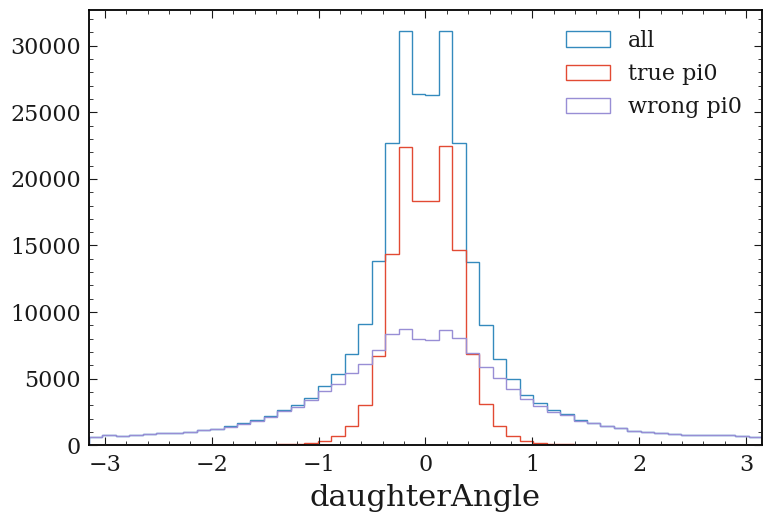

In [93]:
x_min = -3.15
x_max = 3.15
plt.hist(pd_df2['veto_DiffOfPhi_01_75MeV'],histtype='step', bins=np.linspace(x_min,x_max,51), label='all')
plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal_75MeV']==1]['veto_DiffOfPhi_01_75MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0')
plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal_75MeV']!=1]['veto_DiffOfPhi_01_75MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong pi0')

plt.xlim(x_min, x_max)
plt.legend()
plt.xlabel( 'daughterAngle')
plt.tight_layout()

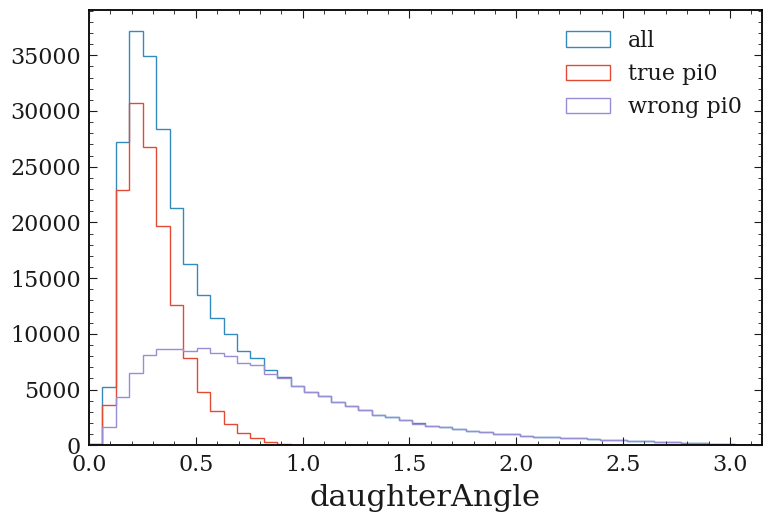

In [94]:
x_min = 0 
x_max = 3.15
plt.hist(pd_df2['veto_daughterAngle_75MeV'],histtype='step', bins=np.linspace(x_min,x_max,51), label='all')
plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal_75MeV']==1]['veto_daughterAngle_75MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0')
plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal_75MeV']!=1]['veto_daughterAngle_75MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong pi0')

plt.xlim(x_min, x_max)
plt.legend()
plt.xlabel( 'daughterAngle')
plt.tight_layout()

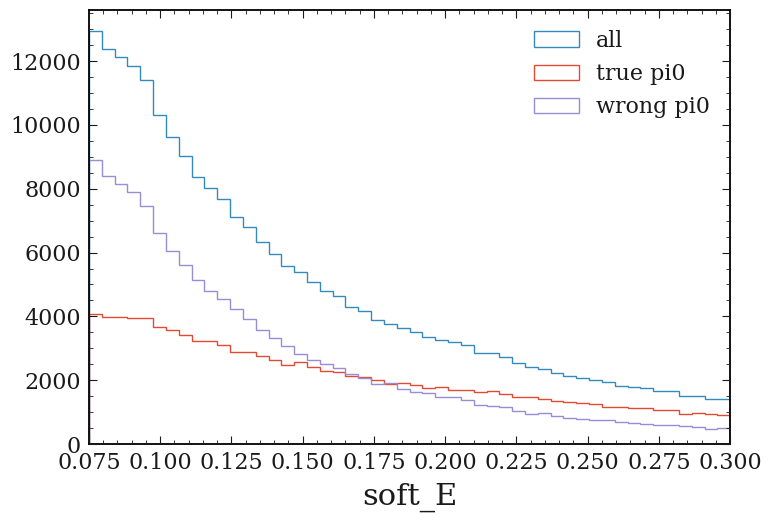

In [97]:
x_min = 0.075
x_max = 0.3
plt.hist(pd_df2['soft_E_75MeV'],histtype='step', bins=np.linspace(x_min,x_max,51), label='all')
plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal_75MeV']==1]['soft_E_75MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='true pi0')
plt.hist(pd_df2[pd_df2['ROE_Dstar_isSignal_75MeV']!=1]['soft_E_75MeV'],histtype='step', bins=np.linspace(x_min,x_max,51),label='wrong pi0')

plt.xlim(x_min, x_max)
plt.legend()
plt.xlabel( 'soft_E')
plt.tight_layout()

In [303]:
pd_df2 = pd_df2.assign(variable=(pd_df2['Dstarp_chiProb'] - pd_df2['ROE_Dstar_chiProb'])/(pd_df2['Dstarp_chiProb'] + pd_df2['ROE_Dstar_chiProb']))

pd_df2['arc_tanh_variable'] = pd_df2 ['variable'].apply(np.arcsin)

In [304]:
print(pd_df2.corr(method='pearson'))

                       D0_M  Dstarp_delM  Dstarp_chiProb  ROE_Dstar_chiProb  \
D0_M               1.000000    -0.026697        0.001008          -0.005725   
Dstarp_delM       -0.026697     1.000000       -0.002914          -0.002453   
Dstarp_chiProb     0.001008    -0.002914        1.000000           0.542186   
ROE_Dstar_chiProb -0.005725    -0.002453        0.542186           1.000000   
ROE_Mgg_75MeV      0.032211    -0.002704        0.005931          -0.073052   
variable           0.003590     0.001665       -0.000399          -0.180688   
arc_tanh_variable  0.009934     0.000369        0.013927          -0.621674   

                   ROE_Mgg_75MeV  variable  arc_tanh_variable  
D0_M                    0.032211  0.003590           0.009934  
Dstarp_delM            -0.002704  0.001665           0.000369  
Dstarp_chiProb          0.005931 -0.000399           0.013927  
ROE_Dstar_chiProb      -0.073052 -0.180688          -0.621674  
ROE_Mgg_75MeV           1.000000  0.035239     

No handles with labels found to put in legend.


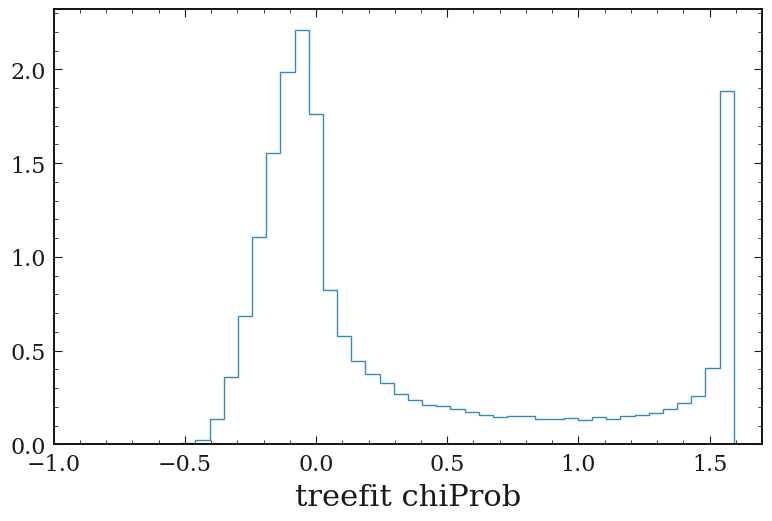

In [299]:
# arc_tanh_variable

plt.hist(pd_df2['arc_tanh_variable'],histtype='step', bins=np.linspace(-1,1.7,51),density=True)
plt.xlim(-1,1.7)
plt.legend()
plt.xlabel( 'treefit chiProb')
plt.tight_layout()

No handles with labels found to put in legend.


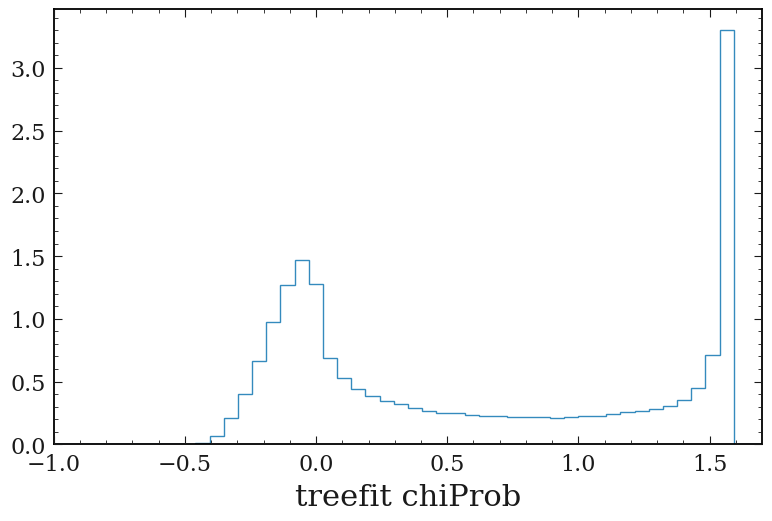

In [305]:
# arc_tanh_variable

plt.hist(pd_df2['arc_tanh_variable'],histtype='step', bins=np.linspace(-1,1.7,51),density=True)
plt.xlim(-1,1.7)
plt.legend()
plt.xlabel( 'treefit chiProb')
plt.tight_layout()

No handles with labels found to put in legend.


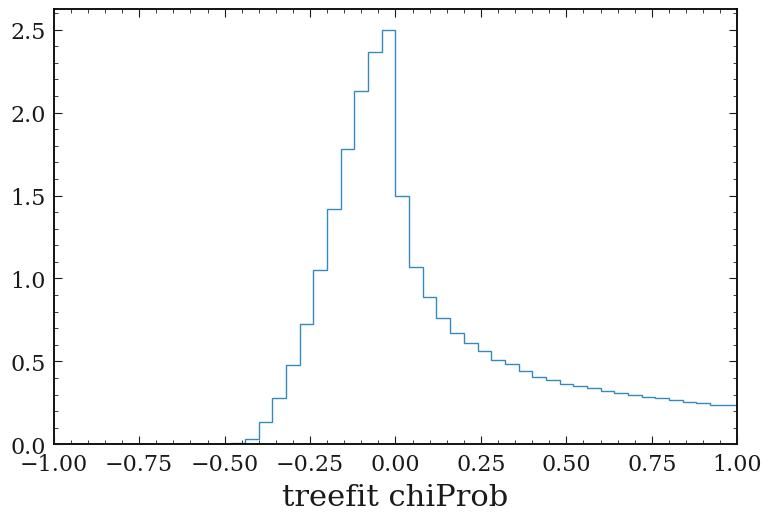

In [292]:
# arc_tanh_variable

plt.hist(pd_df2['arc_tanh_variable'],histtype='step', bins=np.linspace(-1,1,51),density=True)
plt.xlim(-1,1)
plt.legend()
plt.xlabel( 'treefit chiProb')
plt.tight_layout()

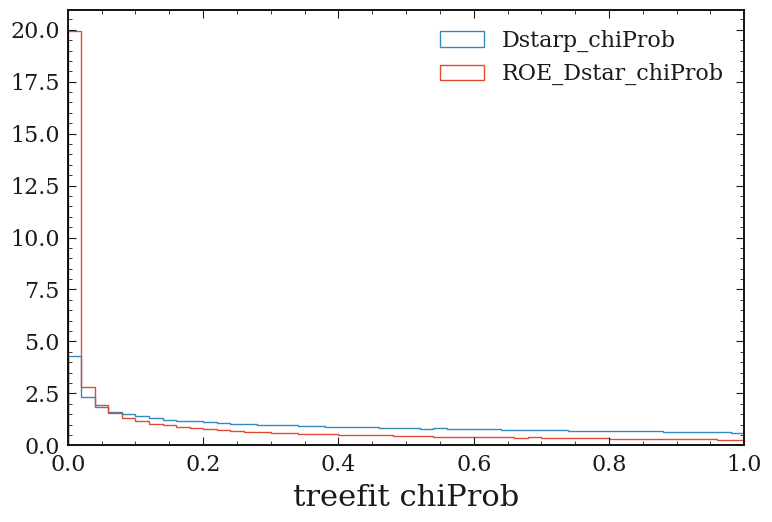

In [241]:
plt.hist(pd_df2['Dstarp_chiProb'],histtype='step', bins=np.linspace(0,1,51),density=True, label = 'Dstarp_chiProb')
plt.hist(pd_df2['ROE_Dstar_chiProb'],histtype='step', bins=np.linspace(0,1,51),density=True, label = 'ROE_Dstar_chiProb')
plt.xlim(0,1)
plt.legend()
plt.xlabel( 'treefit chiProb')
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
# plt.savefig("/home/jykim/signal_chiProb.png")

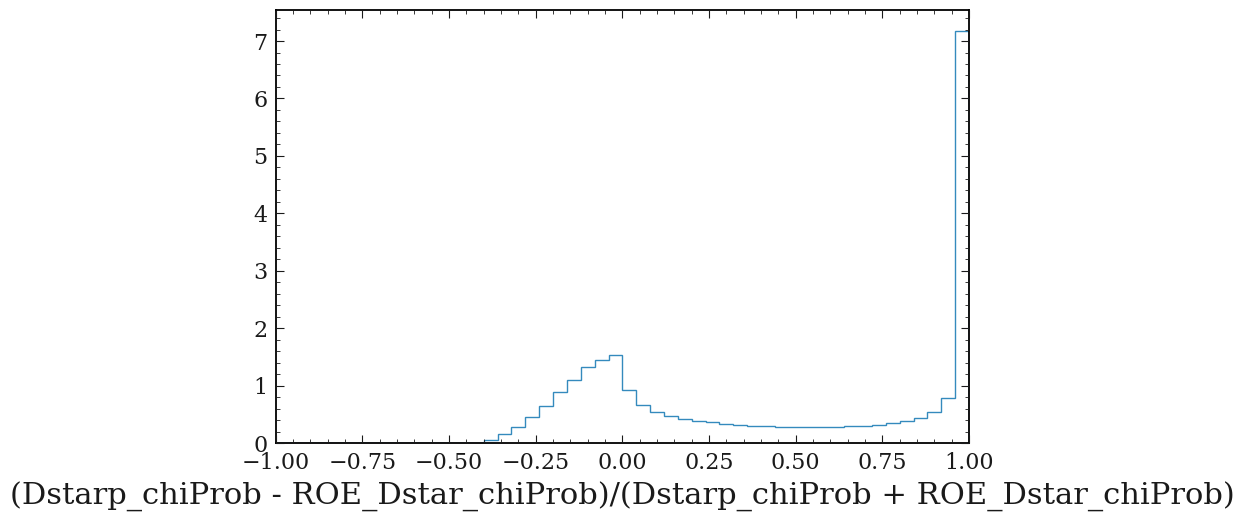

In [242]:
plt.hist(pd_df2['variable'],histtype='step', bins=np.linspace(-1,1,51),density=True)
plt.xlim(-1,1)
plt.xlabel( '(Dstarp_chiProb - ROE_Dstar_chiProb)/(Dstarp_chiProb + ROE_Dstar_chiProb)')
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
# plt.savefig("/home/jykim/signal_chiProb_asym.png")

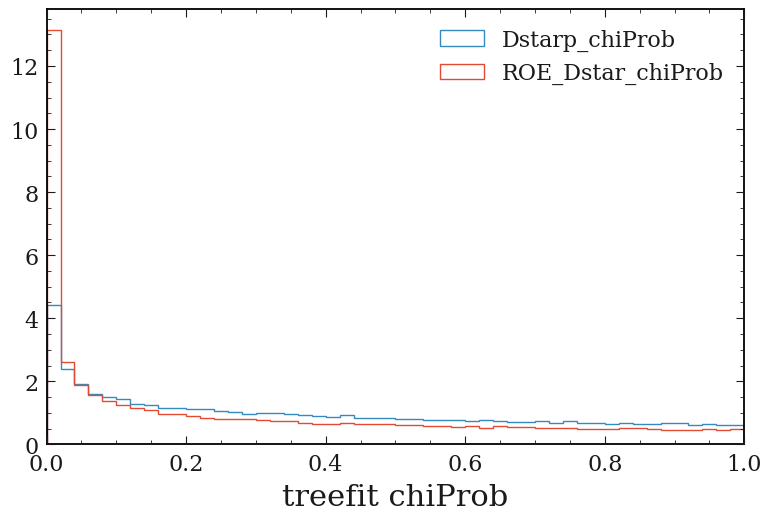

In [248]:
fig = plt.figure()
ax = fig.subplots()
plt.hist(pd_df2['Dstarp_chiProb'],histtype='step', bins=np.linspace(0,1,51),density=True, label = 'Dstarp_chiProb')
plt.hist(pd_df2['ROE_Dstar_chiProb'],histtype='step', bins=np.linspace(0,1,51),density=True, label = 'ROE_Dstar_chiProb')
plt.xlim(0,1)
plt.legend()
plt.xlabel( 'treefit chiProb')
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
# plt.savefig("/media/jykim/phipi0_chiProb.png")

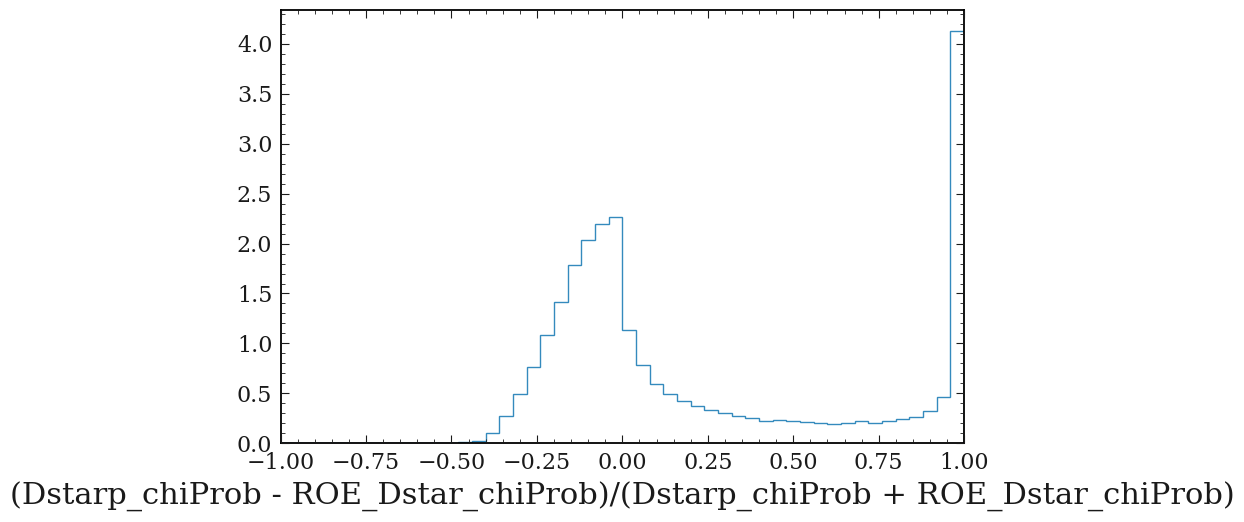

In [254]:
fig = plt.figure()
ax = fig.subplots()
plt.hist(pd_df2['variable'],histtype='step', bins=np.linspace(-1,1,51),density=True)
plt.xlim(-1,1)
plt.xlabel( '(Dstarp_chiProb - ROE_Dstar_chiProb)/(Dstarp_chiProb + ROE_Dstar_chiProb)')
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
# plt.savefig("/home/jykim/phipi0_chiProb_asym.png")

/tmp/ipykernel_10222/3374528522.py:6: RuntimeWarning: invalid value encountered in true_divide
  return (x - y) / (x + y)


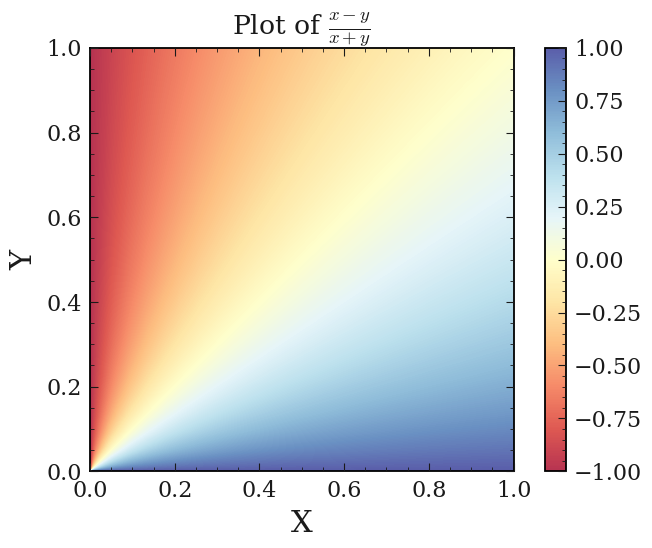

In [259]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def func(x, y):
    return (x - y) / (x + y)

# Create a grid of x and y values
x = np.linspace(0, 1, 400)
y = np.linspace(0, 1, 400)
x, y = np.meshgrid(x, y)

# Compute the function values
z = func(x, y)

# Plotting
plt.figure()
plt.imshow(z, extent=[0, 1, 0, 1], origin='lower', cmap='RdYlBu', alpha=0.8)
plt.colorbar()
plt.title(r'Plot of $\frac{x-y}{x+y}$')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


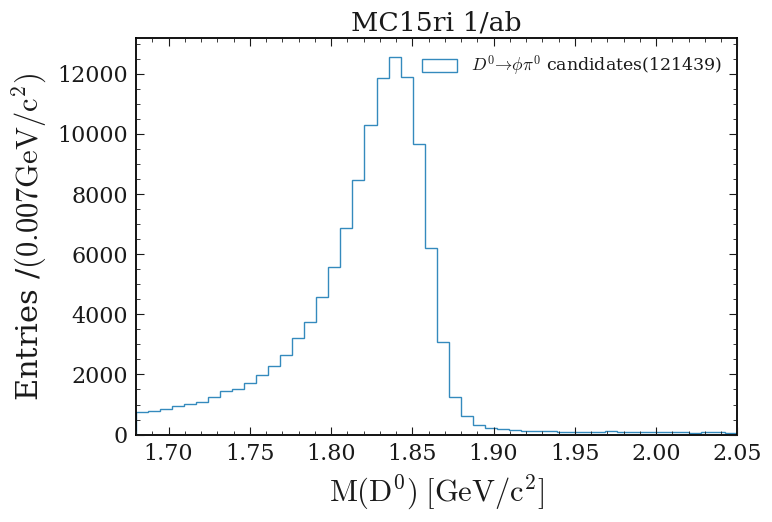

In [250]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.68,2.05,51)

xm = np.linspace(*xrange)

df = pd_df2
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

# plt.hist(df["D0_M"],bins=xm,histtype='bar',label=r'$D^0\to\phi\pi^0$ candidates(' + str(N_df) +')');
plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0\to\phi\pi^0$ candidates(' + str(N_df) +')');

# plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ MC matched(' + str(N_df2) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
plt.xlim(xrange[0],xrange[1])

plt.tight_layout()

# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
plt.savefig(file1_name)

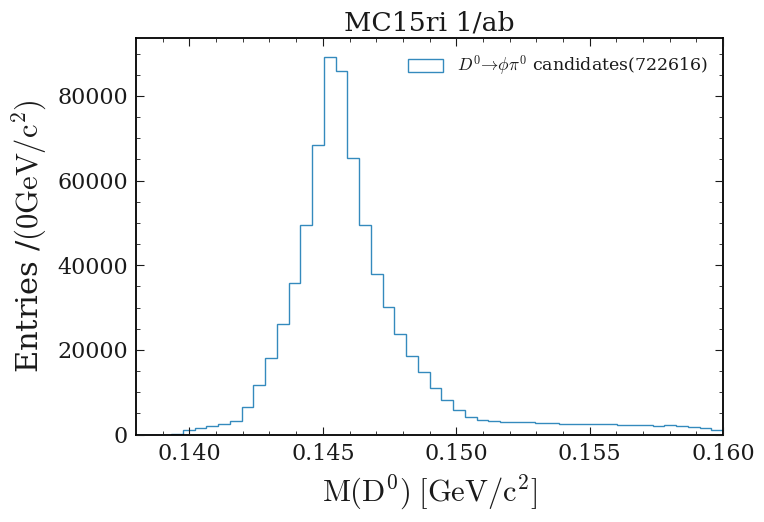

In [168]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0.138,0.160,51)

xm = np.linspace(*xrange)

df = pd_df2
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

plt.hist(df["Dstarp_delM"],bins=xm,histtype='step',label=r'$D^0\to\phi\pi^0$ candidates(' + str(N_df) +')');
# plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ MC matched(' + str(N_df2) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["Dstarp_delM"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
plt.xlim(xrange[0],xrange[1])

plt.tight_layout()

# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
plt.savefig(file1_name)

In [71]:
file = '/media/jykim/T7/storage/Ntuples_ghi/D2phipi0/presel_Vg_D2phipi0_mdst_100000_*.root'
# base_filter=' D0_M>0'
base_filter = 'D0_M>1.67 && D0_M<2.05'
base_filter = 'D0_M>1.67 && D0_M<2.05 && abs(Dstarp_delM-(2.0103-1.8648))<0.00075'

tree = 'phi'
root_files = glob.glob(file)
print(len(root_files))
D0eventeff,D0eff,D0purity,D0multiplicity = cal_eff_purity(file,root_files, tree, base_filter, 1e+7)

100
event_eff=0.0271461, ff=0.0273419, purity=0.0000000, multiplicity=0.9928388


### no Vpi0

In [132]:
file_name = '/media/jykim/T7/storage/Ntuples_ghi/D2phipi0/presel_Vg_noVpi0_D2phipi0_mdst_100000_*.root'
# file_name = '/home/jykim/ntuple_10e5.root'

base_filter = 'D0_M>0'
base_filter = 'D0_M>1.67 && D0_M<2.05'
# base_filter = 'D0_M>1.67 && D0_M<2.05 && abs(Dstarp_delM-(2.0103-1.8648))<0.00075'
# base_filter = 'D0_M>1.67 && D0_M<2.05 &&  dM_pi0_75MeV>0.023'

signal_variables = ['D0_M','Dstarp_delM']
tree = 'phi'

In [133]:
pd_df3 = get_pd(file=file_name, tree=tree,base_filter=base_filter,variables=signal_variables)
pd_df3
# candidate_eff2=len(pd_df2)/1e+7
# print(eff2)

,D0_M,Dstarp_delM
0,1.826815,0.144990
1,1.712447,0.144651
2,1.746695,0.146630
3,1.743113,0.147258
4,1.678455,0.144000
...,...,...
5013,1.689720,0.148866
5014,1.724078,0.147845
5015,1.678441,0.148088
5016,1.678473,0.147508


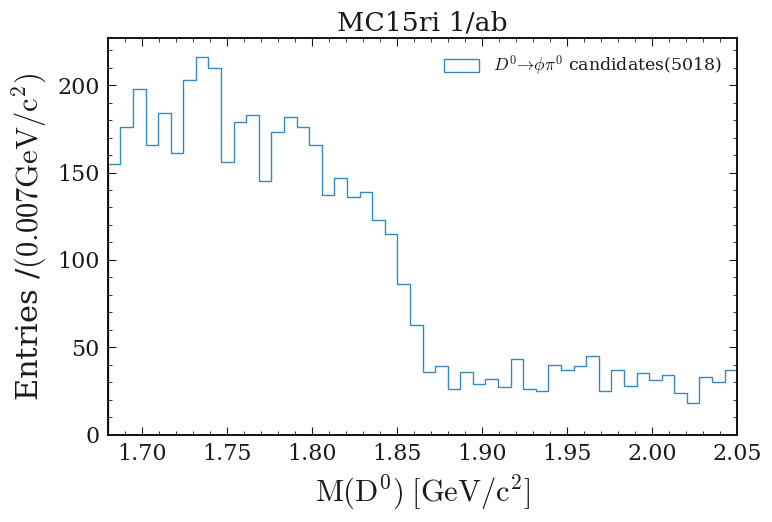

In [134]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.68,2.05,51)

xm = np.linspace(*xrange)

df = pd_df3
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0\to\phi\pi^0$ candidates(' + str(N_df) +')');
# plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ MC matched(' + str(N_df2) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
plt.xlim(xrange[0],xrange[1])

plt.tight_layout()

# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
plt.savefig(file1_name)

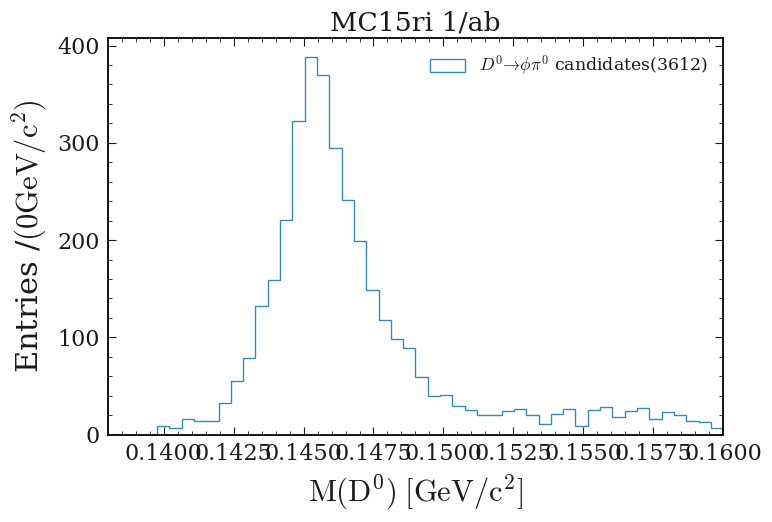

In [125]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0.138,0.160,51)

xm = np.linspace(*xrange)

df = pd_df3
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

plt.hist(df["Dstarp_delM"],bins=xm,histtype='step',label=r'$D^0\to\phi\pi^0$ candidates(' + str(N_df) +')');
# plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ MC matched(' + str(N_df2) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["Dstarp_delM"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
plt.xlim(xrange[0],xrange[1])

plt.tight_layout()

# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
plt.savefig(file1_name)

In [61]:
file = '/media/jykim/T7/storage/Ntuples_ghi/D2phipi0/presel_Vg_noVpi0_D2phipi0_mdst_100000_*.root'
# base_filter=' D0_M>0'
base_filter = 'D0_M>1.67 && D0_M<2.05'

tree = 'phi'
root_files = glob.glob(file)
print(len(root_files))
D0eventeff,D0eff,D0purity,D0multiplicity = cal_eff_purity(file,root_files, tree, base_filter, 1e+7)

100
event_eff=0.0004412, ff=0.0005018, purity=0.0000000, multiplicity=0.8792348


### yes Vpi0

In [150]:
file_name = '/media/jykim/T7/storage/Ntuples_ghi/D2phipi0/presel_Vg_yesVpi0_D2phipi0_mdst_100000_*.root'
# file_name = '/home/jykim/ntuple_10e5.root'

base_filter = 'D0_M>0'
base_filter = 'D0_M>1.67 && D0_M<2.05'
base_filter = 'D0_M>1.67 && D0_M<2.05 &&  dM_pi0_75MeV>0.023'
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 \
           && Dstarp_CMS_p>2.5 && gamma_E>0.48 && dM_pi0_75MeV>0.023 '
signal_variables = ['D0_M','Dstarp_delM']
tree = 'phi'

In [151]:
pd_df4 = get_pd(file=file_name, tree=tree,base_filter=base_filter,variables=signal_variables)
# candidate_eff2=len(pd_df2)/1e+7
# print(eff2)

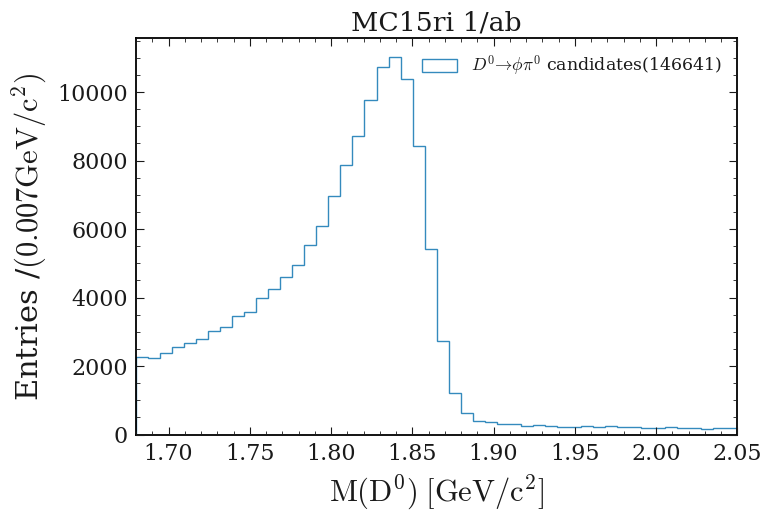

In [152]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.68,2.05,51)

xm = np.linspace(*xrange)

df = pd_df4
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0\to\phi\pi^0$ candidates(' + str(N_df) +')');
# plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ MC matched(' + str(N_df2) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
plt.xlim(xrange[0],xrange[1])

plt.tight_layout()

# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
plt.savefig(file1_name)

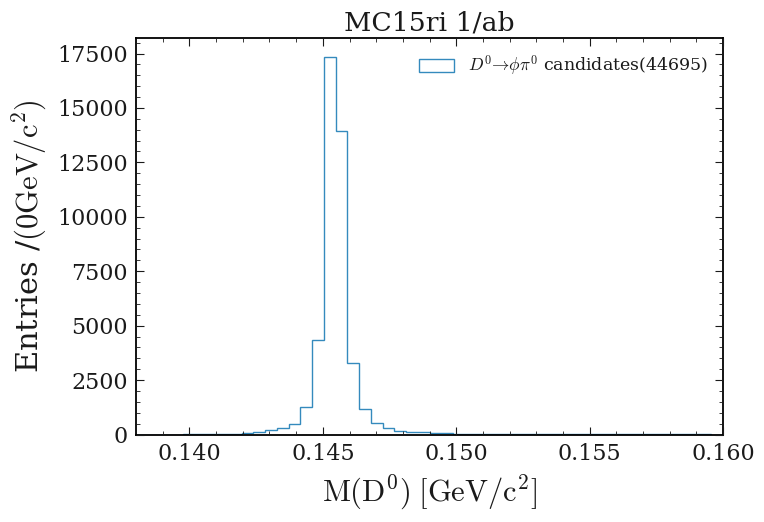

In [157]:
file_name = '/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_phi_*.root'
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 \
           && Dstarp_CMS_p>2.5 && gamma_E>0.48 && dM_pi0_75MeV>0.023 '
tree = 'phi'
pd_sig_phi = get_pd(file=file_name, tree=tree,base_filter=base_filter,variables=signal_variables)

fig = plt.figure()
ax = fig.subplots()
xrange = (0.138,0.160,51)

xm = np.linspace(*xrange)

df =pd_sig_phi 
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

plt.hist(df["Dstarp_delM"],bins=xm,histtype='step',label=r'$D^0\to\phi\pi^0$ candidates(' + str(N_df) +')');
# plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ MC matched(' + str(N_df2) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["Dstarp_delM"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
plt.xlim(xrange[0],xrange[1])

plt.tight_layout()

# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
plt.savefig(file1_name)

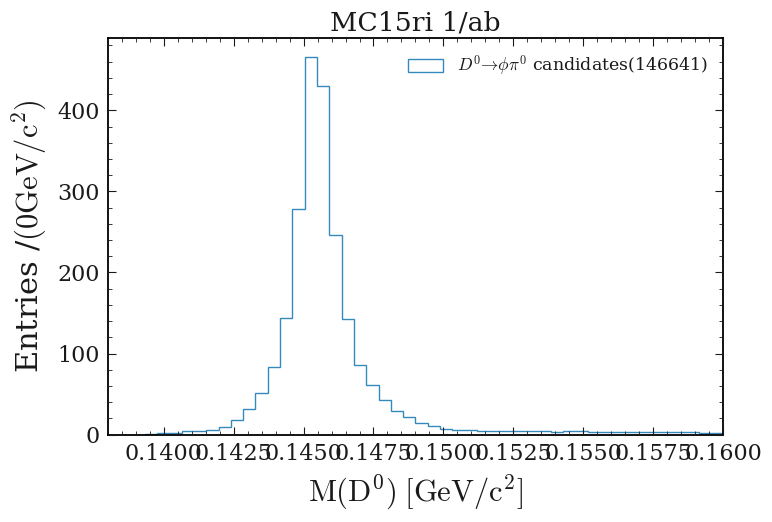

In [160]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0.138,0.160,51)

xm = np.linspace(*xrange)

df = pd_df4
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

plt.hist(df["Dstarp_delM"],density=True,bins=xm,histtype='step',label=r'$D^0\to\phi\pi^0$ candidates(' + str(N_df) +')');
# plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ MC matched(' + str(N_df2) +')');

# plt.hist(pd_sig_phi["Dstarp_delM"],density=True,bins=xm,histtype='step',label=r'$D^0\to\phi\pi^0$ candidates(' + str(N_df) +')');


plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["Dstarp_delM"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
plt.xlim(xrange[0],xrange[1])

plt.tight_layout()

# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
plt.savefig(file1_name)

In [161]:
print(pd_df4.corr(method='pearson'))

                 D0_M  Dstarp_delM
D0_M         1.000000     0.036634
Dstarp_delM  0.036634     1.000000


In [55]:
file_name = '/media/jykim/T7/storage/Ntuples_ghi/D2phipi0/presel_Vg_yesVpi0_D2phipi0_mdst_100000_*.root'
# base_filter=' D0_M>0'
base_filter = 'D0_M>1.67 && D0_M<2.05'

tree = 'phi'
root_files = glob.glob(file)
print(len(root_files))
D0eventeff,D0eff,D0purity,D0multiplicity = cal_eff_purity(file,root_files, tree, base_filter, 1e+7)

100
event_eff=0.0676309, ff=0.0722616, purity=0.0000000, multiplicity=0.9359176


56


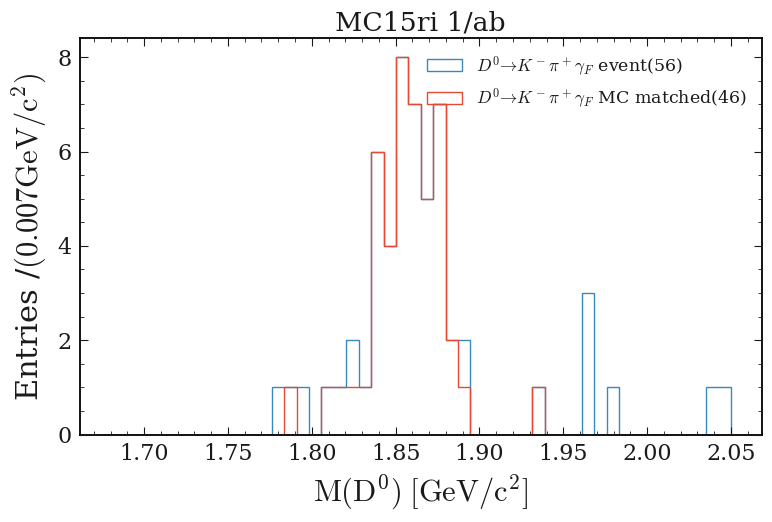

In [72]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.68,2.05,51)

xm = np.linspace(*xrange)

df = pd_df_test
df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)

plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ event(' + str(N_df) +')');
plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ MC matched(' + str(N_df2) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
plt.savefig(file1_name)
print(len(df))

In [67]:
file_name = '/home/jykim/workspace/ssd_T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_sigbkg/topo_FSR/resultfile/result_antiKstar/standard.root'
base_filter = 'D0_M>1.68 && D0_M<2.05 && dM_pi0_75MeV>0.022 && iCascDcyBrP_Dst_0==54 && (antiKstar_Km_genMotherID == antiKstar_Pip_genMotherID && antiKstar_Km_genMotherID == gamma_genMotherID && antiKstar_Km_genMotherPDG == 421)'
signal_variables = ['D0_M','Dstarp_CMS_p',"Dstarp_isSignal"]
tree = 'antiKstar'

In [68]:
pd_df_test2 = get_pd(file=file_name, tree=tree,base_filter=base_filter,variables=signal_variables)

56


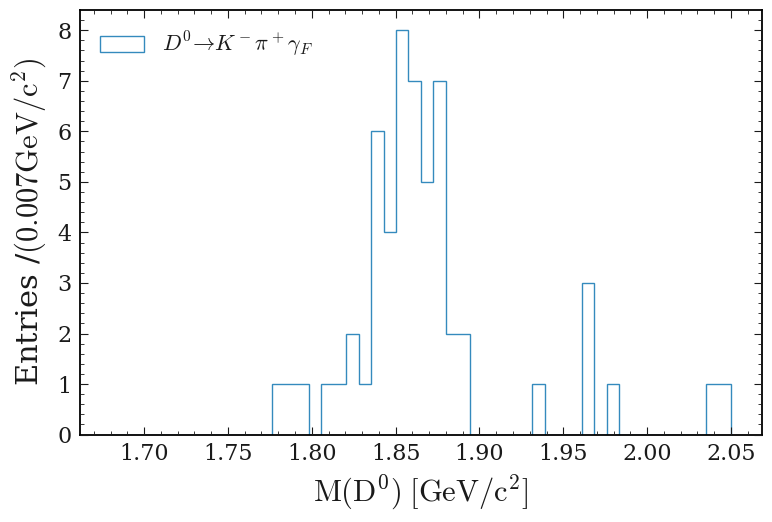

In [69]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.68,2.05,51)

xm = np.linspace(*xrange)

df = pd_df_test
plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$');

plt.legend(loc="upper left")
# ax.set_title(r'1M signal MC' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()

print(len(df))